In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from data import dataset, labels

In [ ]:
def sig_f(value): # Sigmoid Function
    return 1 / (1 + np.exp(-value))

def recognize(input):
    results = np.array([])
    for i in input:
        if i < 1:
            results = np.append(results, 0)
        else:
            results = np.append(results, 1)
            
    results = results.astype(int)
    
    if np.argmax(results) == np.argmax(labels[0]):
        return 'A'
    elif np.argmax(results) == np.argmax(labels[1]):
        return 'B'
    elif np.argmax(results) == np.argmax(labels[2]):
        return 'C'
    elif np.argmax(results) == np.argmax(labels[3]):
        return 'D'
    elif np.argmax(results) == np.argmax(labels[4]):
        return 'E'
    elif np.argmax(results) == np.argmax(labels[5]):
        return 'F'
    elif np.argmax(results) == np.argmax(labels[6]):
        return 'G'
    elif np.argmax(results) == np.argmax(labels[7]):
        return 'H'

In [ ]:
w_i_h = np.random.uniform(-1, 1, (16, 144)) # weight input -> hidden
w_h_o = np.random.uniform(-1, 1, (8, 16)) # weight hidden -> output

In [ ]:
w_i_h

array([[ 0.76112422, -0.58215023,  0.33677738, ..., -0.69152946,
         0.08802355,  0.6267983 ],
       [ 0.7658936 ,  0.85845445,  0.35919934, ..., -0.2087589 ,
         0.20718929, -0.91036431],
       [ 0.47506133,  0.58832035, -0.43973898, ...,  0.42598724,
        -0.48538327,  0.10524488],
       ...,
       [ 0.37215741, -0.02868324,  0.36513883, ...,  0.60947512,
         0.17273384,  0.87977804],
       [ 0.5957114 , -0.28179726,  0.38689335, ...,  0.28099693,
         0.68632104, -0.80471308],
       [-0.79721696,  0.91379639, -0.92245372, ...,  0.33921401,
         0.62313972,  0.3412466 ]])

In [ ]:
learn_rate = 1e-1

In [ ]:
while True:
    for img, lab in zip(dataset, labels):
        lab = lab.reshape(8, 1)
        img = img.reshape(144, 1)

        # Layer 1 : input -> hidden
        h_pre = w_i_h @  img
        h = sig_f(h_pre)
        # Layer 2 : hidden -> output
        o_pre = w_h_o @ h
        o = sig_f(o_pre)
        
        # Mean Squared Error
        e = 1 / len(o) * np.sum((o - lab) ** 2, axis=0)
        
        if e <= 1e-3:
            break

        # Backpropagation : output -> hidden
        delta_o = (lab - o) * (o * (1-o))
        w_h_o += learn_rate * delta_o @ np.transpose(h) 

        # Backpropagation : hidden -> input
        delta_h = np.transpose(w_h_o) @ delta_o * (h * (1-h))
        w_i_h += learn_rate * delta_h @ np.transpose(img)

    print(e)
    if e <= 1e-3:
        break

[0.24033914]
[0.21197574]
[0.19270172]
[0.17805736]
[0.16593862]
[0.15546028]
[0.14620131]
[0.13791885]
[0.1304484]
[0.12365881]
[0.11743924]
[0.11170536]
[0.10639969]
[0.10148436]
[0.09693737]
[0.09275289]
[0.0889399]
[0.08551413]
[0.08248372]
[0.07983558]
[0.07753167]
[0.0755168]
[0.07373143]
[0.07212161]
[0.07064352]
[0.06926397]
[0.06795882]
[0.06671107]
[0.06550905]
[0.06434496]
[0.06321378]
[0.06211243]
[0.06103918]
[0.05999319]
[0.05897415]
[0.0579821]
[0.0570172]
[0.05607967]
[0.05516967]
[0.05428724]
[0.05343231]
[0.05260463]
[0.05180382]
[0.05102933]
[0.05028048]
[0.04955648]
[0.04885644]
[0.04817942]
[0.04752442]
[0.04689044]
[0.04627646]
[0.04568146]
[0.04510446]
[0.04454445]
[0.04400047]
[0.04347155]
[0.04295675]
[0.04245511]
[0.04196568]
[0.04148754]
[0.04101973]
[0.0405613]
[0.04011133]
[0.03966884]
[0.0392329]
[0.03880253]
[0.03837677]
[0.03795465]
[0.0375352]
[0.03711748]
[0.03670058]
[0.03628365]
[0.03586595]
[0.03544685]
[0.03502584]
[0.0346025]
[0.03417653]
[0.03374

In [ ]:
e

array([0.00099976])

Text(0.5, 1.0, 'The predicted character is : A')

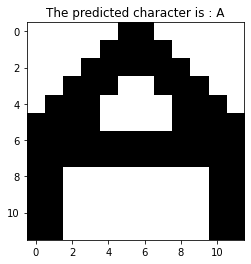

In [ ]:
char = 'A'
if char == 'A':
    index = 0
elif char == 'B':
    index = 1
elif char == 'C':
    index = 2
elif char == 'D':
    index = 3
elif char == 'E':
    index = 4
elif char == 'F':
    index = 5
elif char == 'G':
    index = 6
elif char == 'H':
    index = 7

# Layer 1 : input -> hidden
h_pre = w_i_h @  dataset[index].reshape(144, 1)
h = sig_f(h_pre)
# Layer 2 : hidden -> output
o_pre = w_h_o @ h
o = sig_f(o_pre)

plt.imshow(dataset[index].reshape(12,12), cmap='Greys')
plt.title(f'The predicted character is : {recognize(o)}')